In [1]:
from onset_functions import *
import onset_widgets as w

# Choose spacecraft, sensor, viewing direction and particle species from the drop-down menu:

In [2]:
display(w.spacecraft_drop, w.sensor_drop, w.view_drop, w.species_drop)

Dropdown(description='Spacecraft:', options=('STEREO-A', 'STEREO-B', 'Solar Orbiter', 'SOHO'), value='STEREO-A…

Dropdown(description='Sensor:', options=('SEPT', 'HET'), value='SEPT')

Dropdown(description='Viewing:', options=('sun', 'asun', 'north', 'south'), value='sun')

Dropdown(description='Species:', options=('ions', 'electrons'), value='ions')

# Set the data path and date range to load data:

In [21]:
# The path to where data is located / to be downloaded (by default the current directory)
data_path = f"{os.getcwd()}"

# Format of date: year, month, day
startdate = datetime.date(2021, 10, 28)
enddate = datetime.date(2021, 10, 28)

# Set the time range for the plot:
plot_range = ["2021-10-28 12:00", "2021-10-28 23:59"]

# Set the averaging period, or leave to None to not resample data
# averaging should be a pandas-compatible string, e.g. '1h', '2min', '15s'
averaging = "5min"

# Select the color map used for the plot, by default 'magma'
# for avavailable options, cf. https://matplotlib.org/stable/tutorials/colors/colormaps.html
cmap = 'magma'  # e.g. 'jet', 'viridis', 'magma'

# Just run, don't edit:

In [16]:
# Get event data:
Event_class = Event(spacecraft=w.spacecraft_drop.value, sensor=w.sensor_drop.value, 
                    data_level='l2', species = w.species_drop.value,
                    start_date=startdate, end_date=enddate, 
                    data_path=data_path)

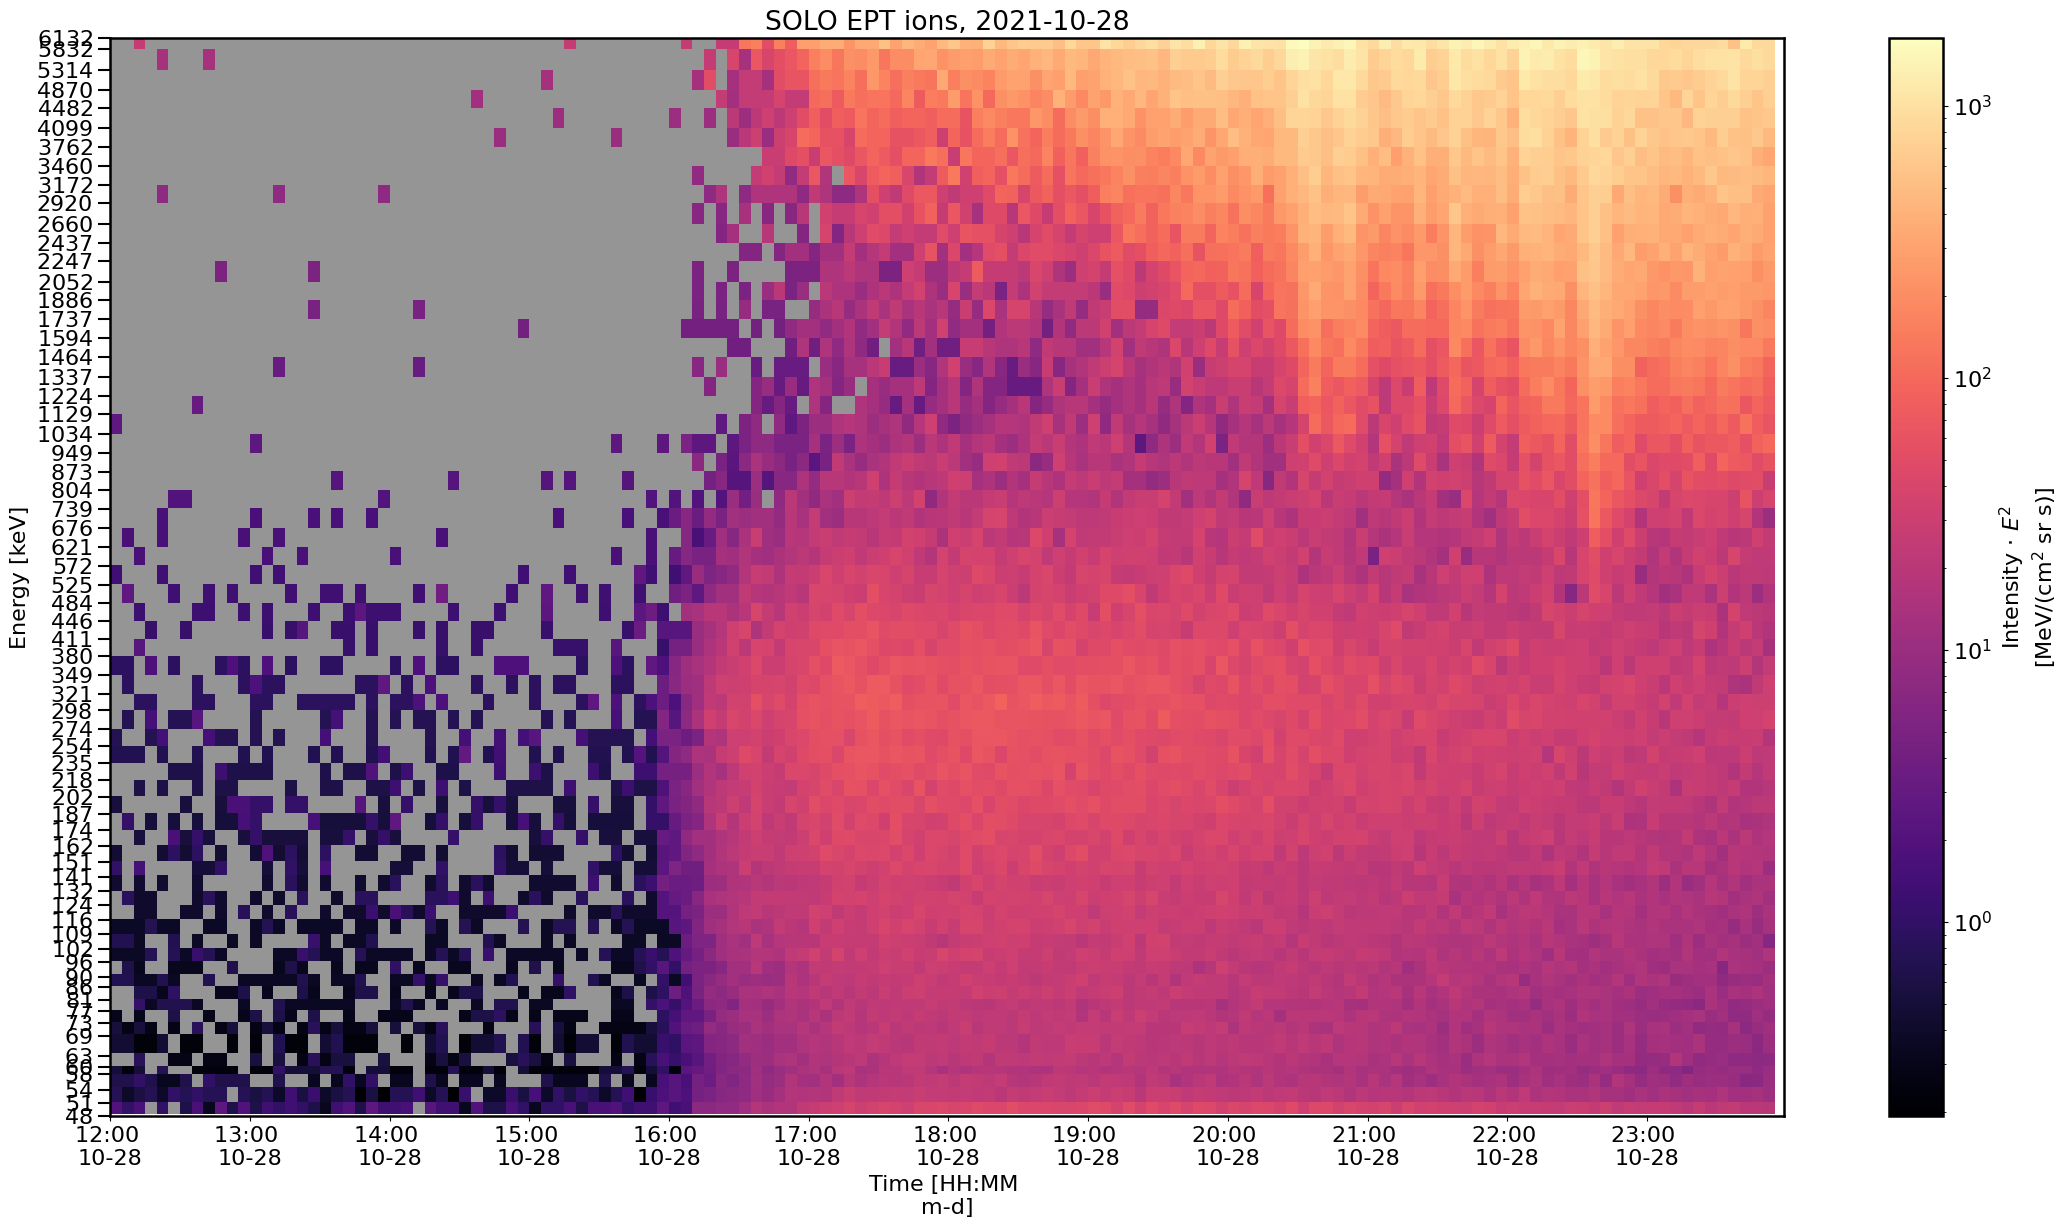

In [22]:
Event_class.dynamic_spectrum(w.view_drop.value, cmap=cmap, xlim=plot_range, resample=averaging)

# Saving the plot

In [9]:
# Path to save the plots
plot_path = f'{os.getcwd()}'

# Use a pre-generated name for the file:
file_name = f"{plot_path}{os.sep}{w.spacecraft_drop.value.replace(' ', '_')}_{w.sensor_drop.value}_{w.view_drop.value+'_' if w.view_drop.value is not None else ''}{w.species_drop.value}{'_'+averaging if averaging is not None else ''}_{startdate.strftime('%Y%m%d')}.png"

# Or type your own here:
# file_name = ""

In [10]:
# Check that the name is correct
print(file_name)

/home/chospa/Documents/Github/tsa_ds/Solar_Orbiter_EPT_sun_electrons_5min_20211009.png


In [16]:
# Save plot
Event_class.fig.savefig(file_name, facecolor="white", transparent=False)

---
# FAQ / Problems <a class="anchor" id="faq"></a>

- **I get some error about missing data, or that the data is broken, or something I don't understand.**

Most times such a problem originates in an incomplete download of the corresponding data file. The easiest approach to solve that problem is to delete the file and run the code again to re-download it. 
To do this, first check if a `path` has been provided. If `path` has *not* been defined (or as `None`), the standard `path` for SunPy downloads should have been used. You can obtain it by running the following code cell:


In [3]:
import sunpy 
sunpy.config.get('downloads', 'download_dir')

'/home/gieseler/sunpy/data'

Open the corresponding directory in your file browser and look for the corresponding data file. Usually it's easiest to order the files by modification date, so that the latest modified file (which usually should be the culprit) comes first. Then delete the corresponding file(s), and run the code again.